# **마트 수요/매출 예측**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 🔈Process01
* 🔉Process02
* 🔊Process03

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 마트 수요/매출 예측
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 Regression(회귀) 예측
```

> **학습목표**

```
▶ 데이터를 Read하고 전처리할 수 있는 역량 습득
▶ Regression(회귀) 예측 문제에 대한 개념 이해
▶ Regression(회귀) 예측 모델링 프로세스 및 코드 이해
```


## **문제상황 Introduction**
---
> **시나리오** 🧮🔍

```
A마트는 주52시간제에 운영으로 인하여 인력난을 겪고 있다. 주 당 판매량을 예측할 수 없기 때문에 근무 스케줄과 인력 운영을 효율적으로  
하기 힘든 상황이다. 대기업 마트가 아니기 때문에 방문자 수, 주차 대수 등 세세한 데이터를 수집할 수 없는 상황이다.
효율적인 인력 운영을 위해서 공공 데이터와 쉽게 구할 수 있는 데이터를 활용하여 주간 마트 판매량 예측을 통해 인력운영을 효율화 하고자 한다.
```  

> **문제정의**

```
▶ 인력운영 비효율로 인한 운영 비용 상승
```  

> **기대효과**

```
▶ 인력운영 효율화로 인한 운영 비용 절감
```

> **해결방안**

```
▶ 주간 판매량 예측을 통해 인력 운영 스케줄 조정
```

> **성과측정**  

```
▶ 주간 판매량 예측량에 따른 스케줄 조정 후 운영 비용 모니터링
```

> **운영**  

```
▶ 1주가 종료되면 차주 판매량을 예측하기 위한 공공데이터 및 내부 데이터 수집
▶ Data를 Model에 Input후 주간 판매량 추출
▶ 주간 판매량에 따라 인력 운영 계획 수립
```

> **데이터 살펴보기**

* 마케팅 캠페인 관련 데이터
* 데이터 명세 ⬇

|Store|Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|CPI|Unemployment|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|상점ID|날짜|주간판매량|공휴일여부|온도|연료가격|소비자물가지수|실업률|




In [1]:
#  Warnings 제거
import warnings
warnings.filterwarnings('ignore')


In [2]:
#  Data read
import pandas as pd
df = pd.read_csv('../data/S_PJT01_DATA.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## **🔈Process01**  
**┗ 판매 추이 분석**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [4]:
#  Data 형태 확인
#  6,435 row, 8 col로 구성됨
print('df', df.shape)

df (6435, 8)


In [5]:
#  Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#  Null 값 확인
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [7]:
#  Outlier 확인
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
#  섭씨온도 변환
df['Temperature']= (df['Temperature']-32) / 1.8
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.055556,2.625,211.350143,8.106


In [9]:
df['Temperature'].describe()

count    6435.000000
mean       15.924324
std        10.247185
min       -18.922222
25%         8.588889
50%        17.038889
75%        23.855556
max        37.855556
Name: Temperature, dtype: float64

In [10]:
#  data time 변경
import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### · 판매 추이 분석
---



In [12]:
#  총 45개의 Store
len(df['Store'].unique())

45

In [13]:
df['Store'].nunique()

45

In [ ]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.055556,2.625,211.350143,8.106


In [14]:
#  날짜 기준으로 오름차순 정렬
df = df.sort_values(by=['Date'])
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
606,5,2010-01-10,283178.12,0,21.722222,2.603,212.226946,6.768
2036,15,2010-01-10,566945.95,0,15.383333,2.840,132.756800,8.067
5897,42,2010-01-10,481523.93,0,30.005556,3.001,126.234600,9.003
4610,33,2010-01-10,224294.39,0,33.027778,3.001,126.234600,9.265
5039,36,2010-01-10,422169.47,0,23.700000,2.567,210.440443,8.476


In [15]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-01-10 00:00:00'), Timestamp('2012-12-10 00:00:00'))

In [16]:
#  1번 Store df
df1 = df[df['Store']==1].sort_values(by=['Date'])
df1.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
34,1,2010-01-10,1453329.50,0,22.161111,2.603,211.671989,7.838
8,1,2010-02-04,1594968.28,0,16.816667,2.719,210.820450,7.808
21,1,2010-02-07,1492418.14,0,27.172222,2.669,211.223533,7.787
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
30,1,2010-03-09,1540163.53,0,27.338889,2.577,211.531248,7.787
43,1,2010-03-12,1548033.78,0,9.594444,2.708,211.607193,7.838
6,1,2010-03-19,1472515.79,0,12.544444,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,10.805556,2.732,211.018042,8.106
17,1,2010-04-06,1615524.71,0,27.050000,2.705,211.176428,7.808


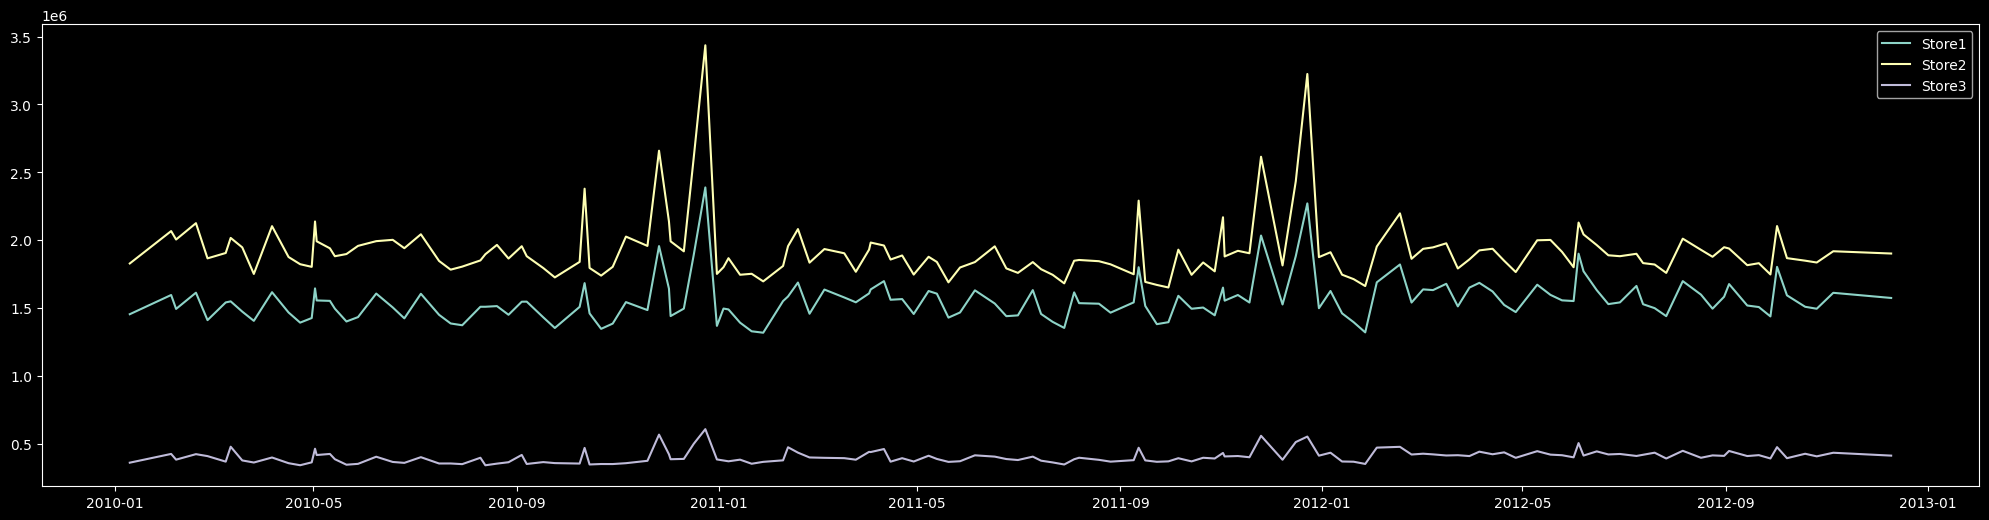

In [17]:
#  Sotre별 판매량  수준 추이의 차이가 있기 때문에 독립적인 모델의 생성이 필요
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df1['Date'], df1['Weekly_Sales'], label='Store1');
plt.gcf().set_size_inches(25, 6)

df2 = df[df['Store']==2].sort_values(by=['Date'])
plt.plot(df2['Date'], df2['Weekly_Sales'], label='Store2');
plt.gcf().set_size_inches(25, 6)

df3 = df[df['Store']==3].sort_values(by=['Date'])
plt.plot(df3['Date'], df3['Weekly_Sales'], label='Store3');
plt.gcf().set_size_inches(25, 6)

plt.legend()

In [18]:
#  store1과 store2는 비슷한 주간 판매량이지만 store 3는 판매량 수준이 다름
df_concat = pd.DataFrame({'Date' : list(df1['Date']) ,
                          'Store1_sales': list(df1['Weekly_Sales']),
                          'Store2_sales': list(df2['Weekly_Sales']),
                          'Store3_sales': list(df3['Weekly_Sales'])})
df_concat

,Date,Store1_sales,Store2_sales,Store3_sales
0,2010-01-10,1453329.50,1827440.43,358784.10
1,2010-02-04,1594968.28,2066187.72,423294.40
2,2010-02-07,1492418.14,2003940.64,381151.72
3,2010-02-19,1611968.17,2124451.54,421642.19
4,2010-02-26,1409727.59,1865097.27,407204.86
...,...,...,...,...
138,2012-10-08,1592409.97,1866719.96,391811.60
139,2012-10-19,1508068.77,1847990.41,424513.08
140,2012-10-26,1493659.74,1834458.35,405432.70
141,2012-11-05,1611096.05,1917520.99,431985.36


## **🔉Process02**  
**┗ 변수별 매출 영향도 분석**  
---


### · line plot - 상관관계 분석
---


In [19]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
34,1,2010-01-10,1453329.50,0,22.161111,2.603,211.671989,7.838
8,1,2010-02-04,1594968.28,0,16.816667,2.719,210.820450,7.808
21,1,2010-02-07,1492418.14,0,27.172222,2.669,211.223533,7.787
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106


In [20]:
#  Holiday
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

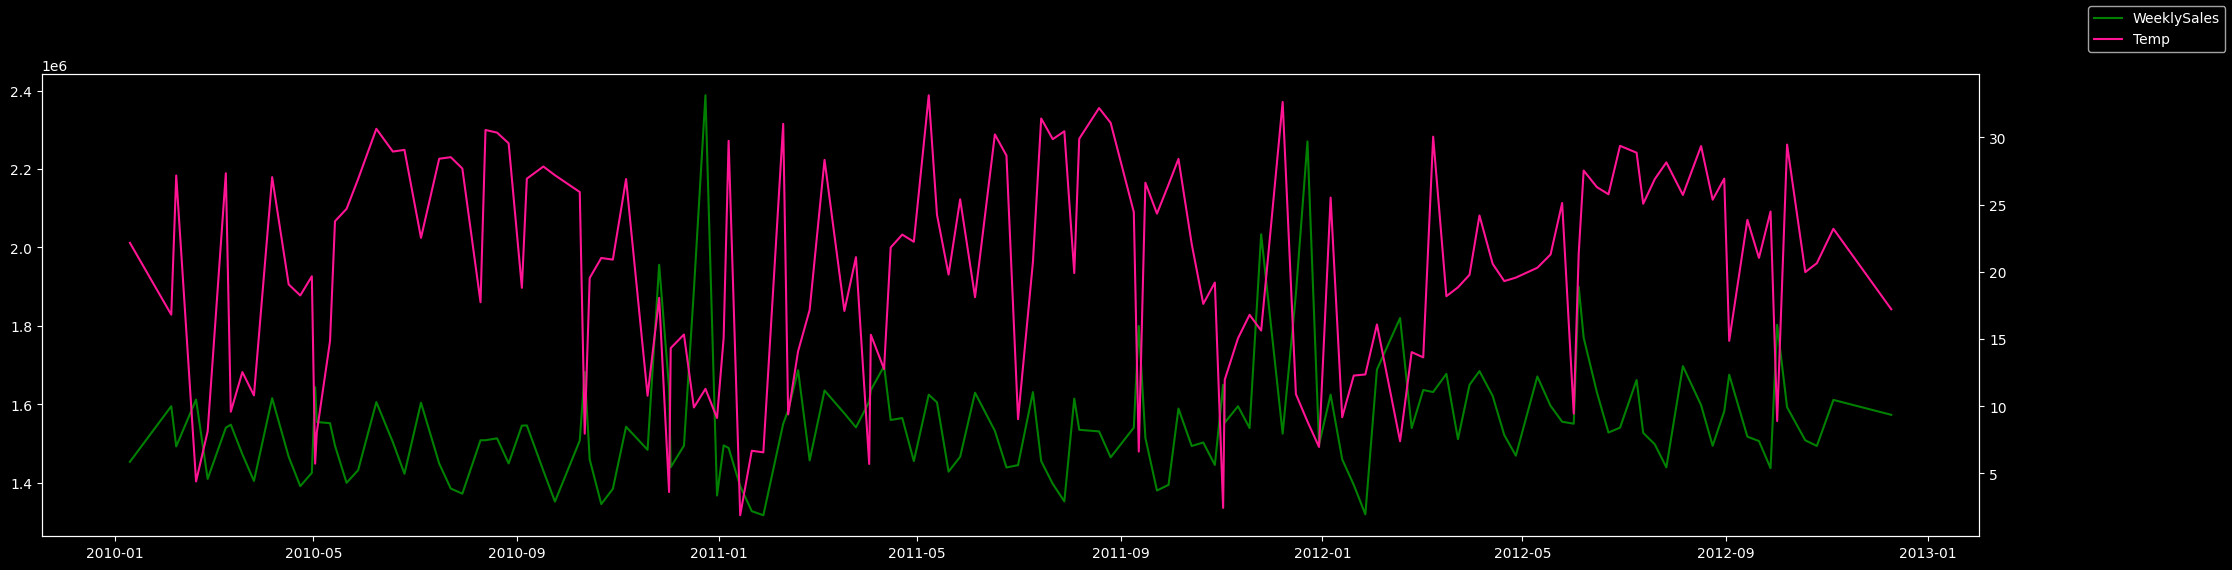

In [21]:
#  온도와 주간 판매량, 온도가 올라가면 판매량이 적어지고 온도가 낮아지면 판매량이 증가하는 약소한 경향
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Temperature'], color='deeppink', label='Temp')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()


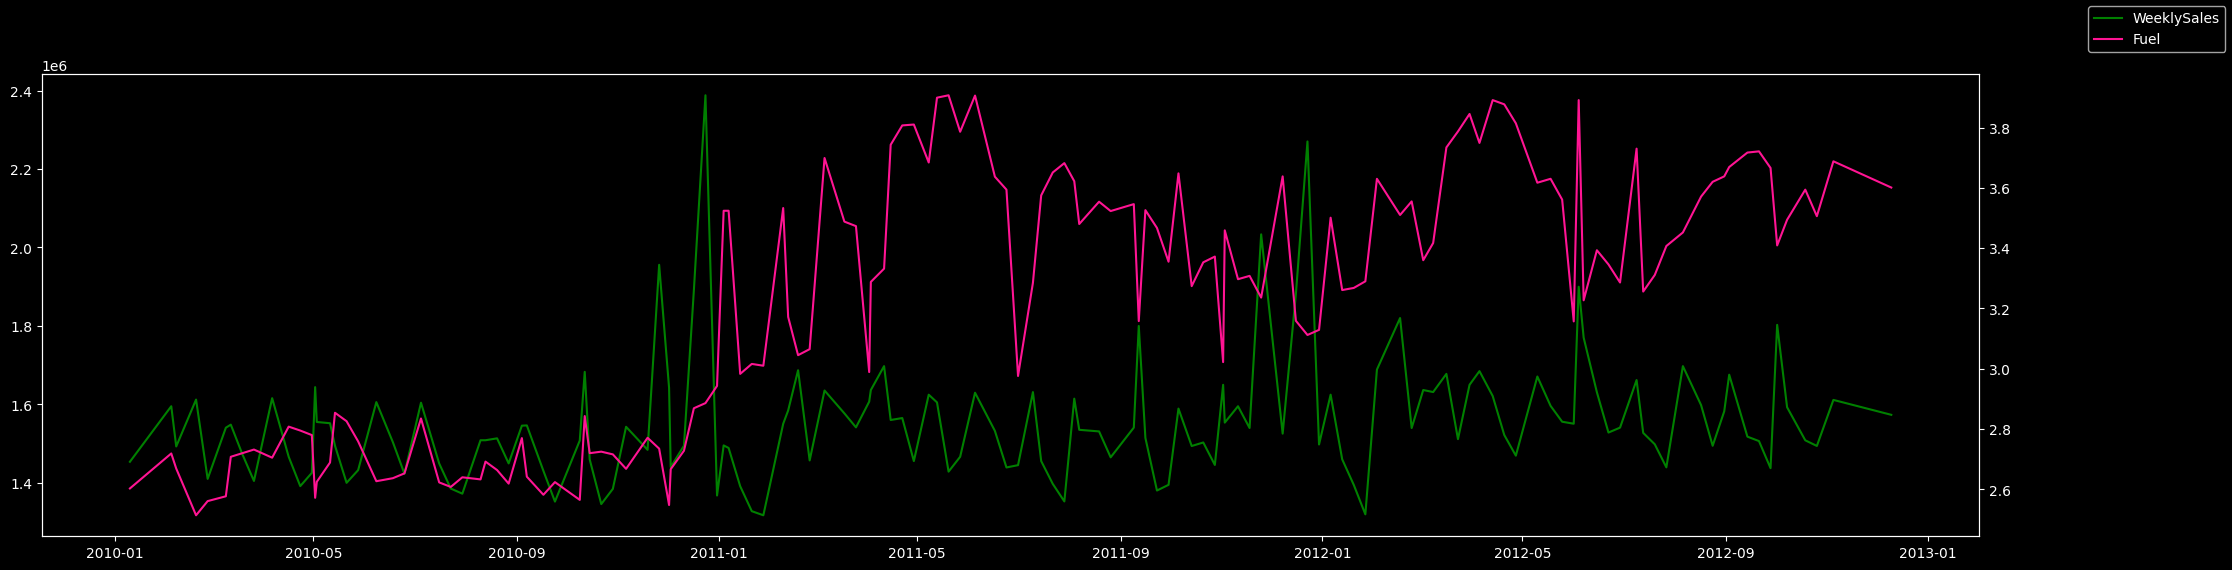

In [22]:
#  연료 가격과 주간 판매량
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label= 'WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Fuel_Price'], color='deeppink', label='Fuel')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

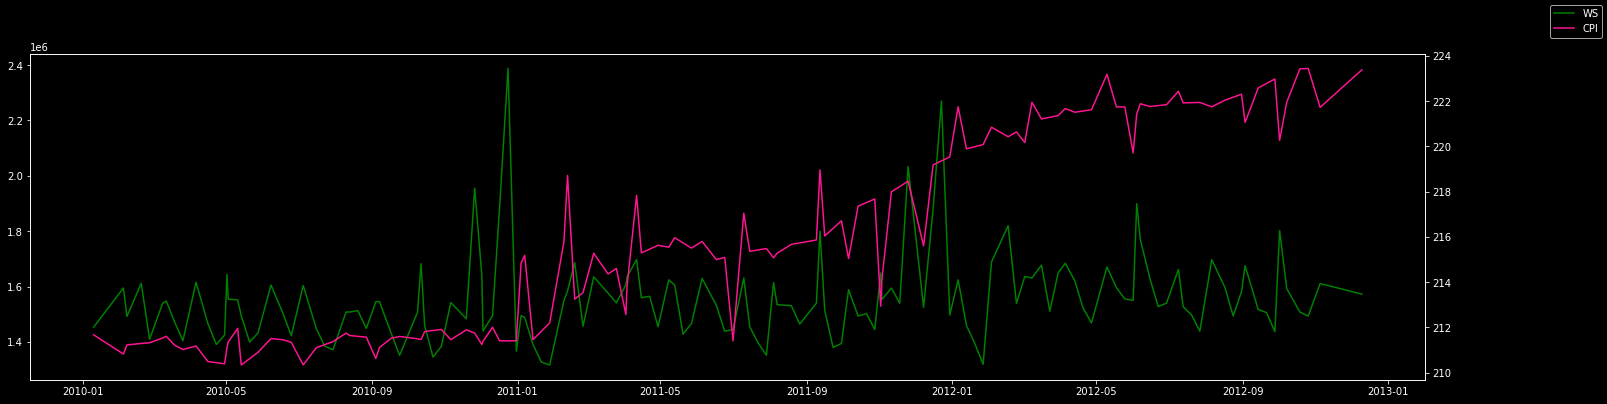

In [ ]:
# ▶ CPI와 주간 판매량
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WS')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['CPI'], color='deeppink', label='CPI')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

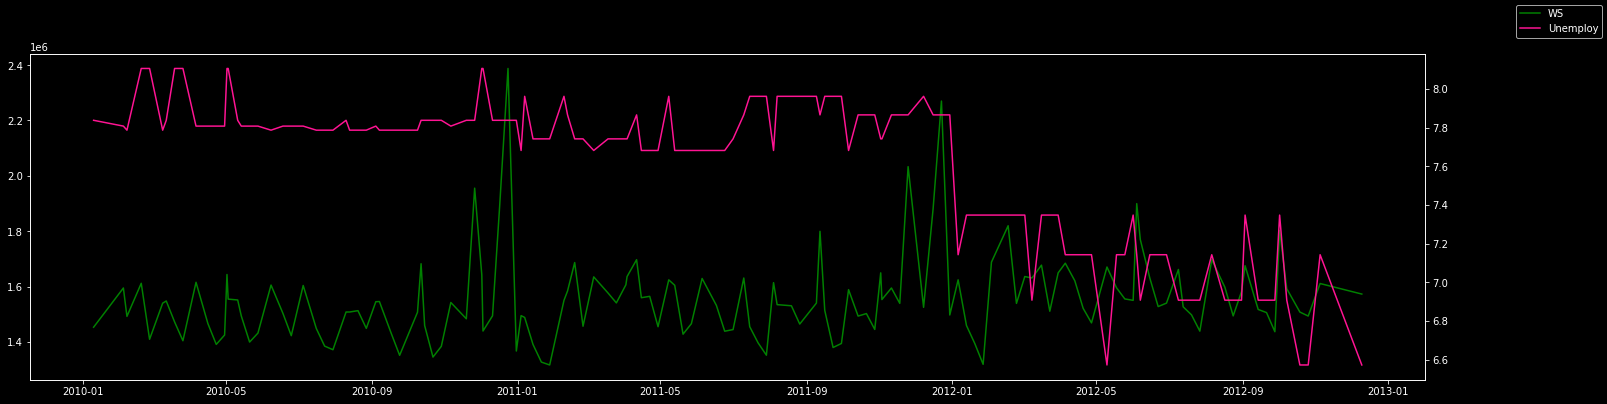

In [ ]:
#  실업률과 주간 판매량
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WS')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Unemployment'], color='deeppink',label='Unemploy')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

### · heat map - 상관관계 분석
---



In [ ]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
34,1,2010-01-10,1453329.50,0,22.161111,2.603,211.671989,7.838
8,1,2010-02-04,1594968.28,0,16.816667,2.719,210.820450,7.808
21,1,2010-02-07,1492418.14,0,27.172222,2.669,211.223533,7.787
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106


In [ ]:
df_corr = df1.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)
df_corr.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.222701,0.124592,0.225408,-0.097955
Temperature,-0.222701,1.000000,0.228493,0.118503,-0.180695
Fuel_Price,0.124592,0.228493,1.000000,0.755259,-0.513944
CPI,0.225408,0.118503,0.755259,1.000000,-0.813471
Unemployment,-0.097955,-0.180695,-0.513944,-0.813471,1.000000


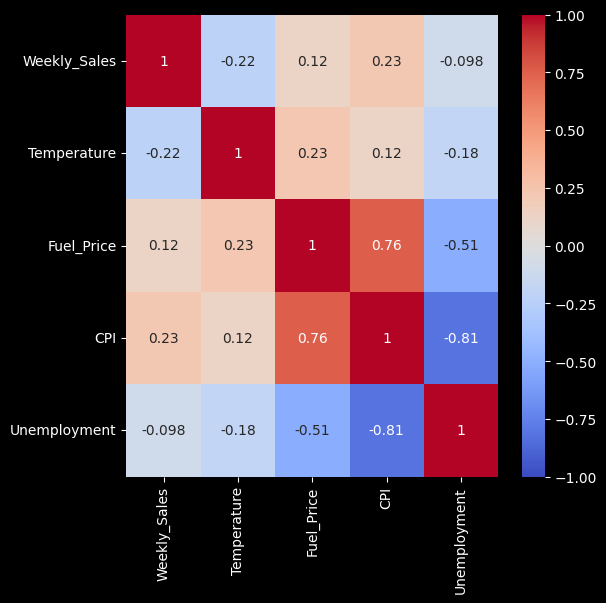

In [25]:
# 연속형 변수를 제외하고 Heat map 분석
df_corr = df1.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)

sns.heatmap(df_corr.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(6, 6)

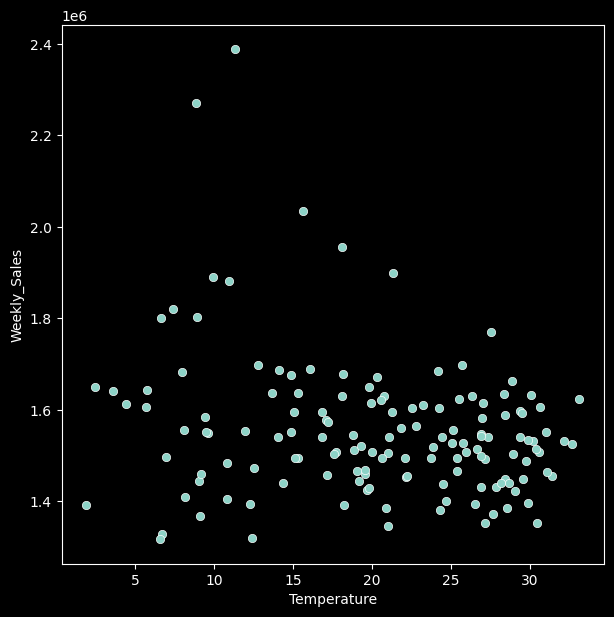

In [26]:
#  Unemployment와 주간 판매량 간의 산점도(Scatter plot)
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df1);
plt.gcf().set_size_inches(7, 7)

## **🔊Process03**  
**┗ ML 활용 구매량 예측**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [ ]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
34,1,2010-01-10,1453329.50,0,22.161111,2.603,211.671989,7.838
8,1,2010-02-04,1594968.28,0,16.816667,2.719,210.820450,7.808
21,1,2010-02-07,1492418.14,0,27.172222,2.669,211.223533,7.787
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106


In [ ]:
# 날짜 데이터에서 월과 요일을 추출하여 새롤운 파생 변수로 활용
df1['Dayofweek'] = df1['Date'].dt.dayofweek
df1['month'] = df1['Date'].dt.month
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
34,1,2010-01-10,1453329.50,0,22.161111,2.603,211.671989,7.838,6,1
8,1,2010-02-04,1594968.28,0,16.816667,2.719,210.820450,7.808,3,2
21,1,2010-02-07,1492418.14,0,27.172222,2.669,211.223533,7.787,6,2
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,4,2
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,4,2


In [ ]:
len(df1)

143

In [ ]:
# 모델링을 학습하기 위한 Fearue(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df1.drop(['Store', 'Date', 'Weekly_Sales', 'CPI'], axis=1)
Y=df1['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1239)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(85, 6)
(85,)
(58, 6)
(58,)


### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [ ]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=1239)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=1239)

In [ ]:
#  예측
#  예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  59353.16787551551
r2_score(r2):  0.6917011799870604

mae_test(mae):  84946.48268027525
r2_score(r2):  0.23138722534914635


In [ ]:
#  다항회귀, 성능이 좋진 않음
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(x_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly.transform(x_test)

y_pred_test = lin_reg.predict(X_test_poly)


mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)

r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_test(mae):  219622.46492455943
r2_score(r2):  -12.608039314530837


In [ ]:
# e10, 표현을 숫자료 변경
pd.options.display.float_format = '{:.2f}'.format

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result.head(5)

,Real Values,Predicted Values,diff
140,1573072.81,1653025.85,-79953.04
5,1439541.59,1545174.90,-105633.31
29,1449142.92,1453163.60,-4020.68
20,1422711.60,1457218.58,-34506.98
77,1352219.79,1519991.21,-167771.42


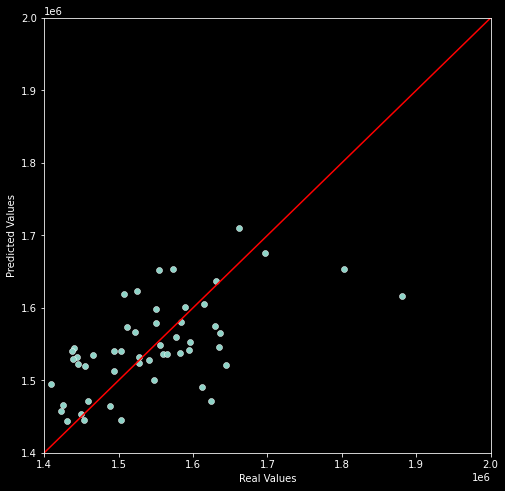

In [ ]:
#  xlim과 ylim을 조정해서 선형 Fitting이 잘 되는지를 확인
sns.scatterplot(result['Real Values'], result['Predicted Values'])
plt.xlim(1400000, 2000000)
plt.ylim(1400000, 2000000)

x = [1400000, 2000000]
y = [1400000, 2000000]
plt.plot(x, y, color='red')

plt.gcf().set_size_inches(8 ,8)

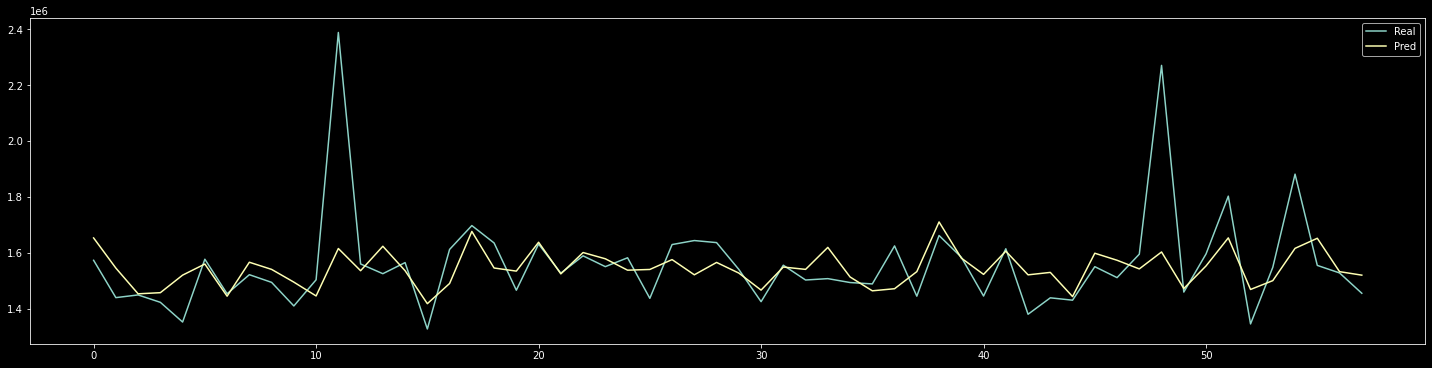

In [ ]:
#  실제값과 예측값 Plotting, peak를 맞추지 못함
result = result.reset_index(drop=True)

plt.plot(result.index, result['Real Values'], label='Real');
plt.plot(result.index, result['Predicted Values'], label='Pred');
plt.legend()
plt.gcf().set_size_inches(25, 6)

### · 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악

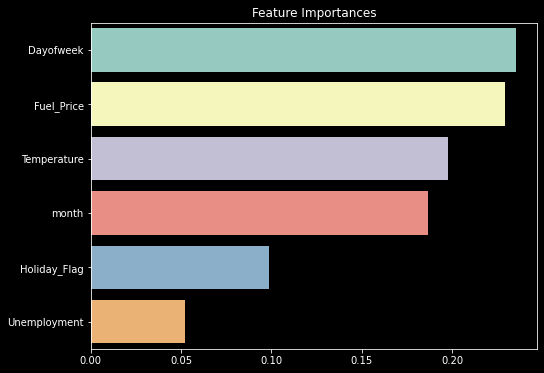

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
df1.groupby('Dayofweek')['Weekly_Sales'].mean().sort_values(ascending=False)

Dayofweek
0   1669668.99
3   1627476.80
2   1599922.07
1   1594145.54
6   1586710.55
5   1546772.22
4   1527640.62
Name: Weekly_Sales, dtype: float64

### · 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [ ]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfr)

# 모델 Read
rfr_from_pickle = pickle.loads(saved_model)